In [ ]:
from aima3.agents import *
from aima3.notebook import psource
loc_A = (0, 0)
loc_B = (1, 0)

def program(percept): 
  loc, status = percept
  return ('Suck' if status == 'Dirty' else'Right' if loc == loc_A
  else'Left')
  return program

# SimpleReflexAgentProgram() 
simple_reflex_agent = Agent(program)
loc_A, loc_B = (0, 0), (1, 0)
trivial_vacuum_env = TrivialVacuumEnvironment()
print("State of the Environment: {}.".format(trivial_vacuum_env.status))
trivial_vacuum_env.add_thing(simple_reflex_agent)
print("SimpleReflexVacuumAgent is located at {}.".format(simple_reflex_agent.location))

for x in range(3):
  trivial_vacuum_env.step()
  print("State of the Environment: {}.".format(trivial_vacuum_env.status))
  print("SimpleReflexVacuumAgent is located at {}.".format(simple_reflex_agent.location ))

for x in range(3):
  trivial_vacuum_env.step()
  print("State of the Environment: {}.".format(trivial_vacuum_env.status))
  print("SimpleReflexVacuumAgent is located at {}.".format(simple_reflex_agent.location ))



State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
SimpleReflexVacuumAgent is located at (0, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
SimpleReflexVacuumAgent is located at (1, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
SimpleReflexVacuumAgent is located at (0, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
SimpleReflexVacuumAgent is located at (1, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
SimpleReflexVacuumAgent is located at (0, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
SimpleReflexVacuumAgent is located at (1, 0).
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
SimpleReflexVacuumAgent is located at (0, 0).


Consider an interactive and cognitive environment (ICE) in which a smart camera is
monitoring robot movement from one location to another. Let a robot be at location A for
some time instant and then moves to point B and eventually reaches at point C and so on
and so forth shown in the Fig. Develop a Python code to calculate a distance between
reference point R (4, 0) of a camera and A, B, and C and N number of locations.

In [ ]:
import numpy as np

def distance(R, n_points):
    R = np.array(R) 
    distances = []
    for point in n_points:
        point = np.array(point)
        dist = np.linalg.norm(R - point) 
        distances.append(dist)
    return distances

R = [4, 0]
n_points = [[0, 1], [1, 1], [2, 2]]
print(distance(R, n_points))

r [4, 0]
r (2,)
[4.123105625617661, 3.1622776601683795, 2.8284271247461903]


Consider a scenario, cameras placed on every side of the car — front, rear, left and right —
to stitch together a 360-degree view of the environment. For a three-lane road a car is
moving on a middle lane, consider the below scenario
• If the front camera detects the object within range of 8 meters breaks are applied
automatically.
• If the left camera detects the object within range of 2 meters car moves to the right lane.
• If the right camera detects the object within range of 2 meters car moves to the left lane.
• For parking the car if the rear camera detects the object within 5 cm breaks are applied.

In [ ]:
def car_movement(front_dist, left_dist, right_dist, rear_dist):
    if front_dist <= 8:
        print("Applying breaks (front camera detected object within 8 meters)")
    elif left_dist <= 2:
        print("Moving to the right lane (left camera detected object within 2 meters)")
    elif right_dist <= 2:
        print("Moving to the left lane (right camera detected object within 2 meters)")
    elif rear_dist <= 0.05:
        print("Applying breaks for parking (rear camera detected object within 5 cm)")
    else:
        print("Continuing normal movement (no objects detected within range)")

car_movement(7, 1.5, 2.5, 0.03)

Applying breaks (front camera detected object within 8 meters)


Consider the following scenario where the UAV receives temperature data from the installed
sensors in a residential area. Assume that there are nine sensors installed that are measuring
temperature in centigrade. Develop a Python code to calculate the average temperature
in F.

In [ ]:
def avg_temp_fahrenheit(temperatures_c):
    temperatures_f = [((9/5)*temp + 32) for temp in temperatures_c]
    avg_temp_f = sum(temperatures_f) / len(temperatures_f)
    return avg_temp_f

temperatures_c = [23, 25, 26, 24, 22, 21, 20, 19, 18]
print(avg_temp_fahrenheit(temperatures_c),'F')

71.6 F


An AI startup has approached you to write a program for their automatic vacuum cleaner.
For the vacuum cleaner the room appears to be a matrix of n * m. Each index referred to as
a cell of the matrix is valued as dirty “D”, clean “C”. The cells which are occupied by the stuff
in the room are blocked and valued “B”. The vacuum can move in all four directions (up,
down, left, right), and if the cell status is D, it will clean the cell and change the status to “C”,
if the cell status is either C, it will not enter the cell. The vacuum will stop working if the
surrounding of its positions is cleaned (Up, Left, Right, Down), i.e., the status of all the cells is
either C. The vacuum may start cleaning the room from the first cell (0, 0) or any random
location. You will trace the path of the vacuum and display at the end of the program.


In [ ]:
def print_matrix(matrix):
    for row in matrix:
        print(" ".join(row))
    print()

def is_valid_move(matrix, i, j):
    return i >= 0 and i < len(matrix) and j >= 0 and j < len(matrix[0]) and matrix[i][j] == "D"

def get_valid_moves(matrix, i, j):
    moves = []
    if is_valid_move(matrix, i - 1, j):
        moves.append((i - 1, j))
    if is_valid_move(matrix, i + 1, j):
        moves.append((i + 1, j))
    if is_valid_move(matrix, i, j - 1):
        moves.append((i, j - 1))
    if is_valid_move(matrix, i, j + 1):
        moves.append((i, j + 1))
    return moves

def is_surrounded(matrix, i, j):
    return not any(is_valid_move(matrix, x, y) for x, y in [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)])

def clean_room(matrix, i, j, path):
    matrix[i][j] = "C"
    path.append((i, j))
    moves = get_valid_moves(matrix, i, j)
    if not moves:
        return
    for move in moves:
        clean_room(matrix, move[0], move[1], path)
    if is_surrounded(matrix, i, j):
        return

room = [
    ["D", "D", "D", "C"],
    ["C", "B", "C", "D"],
    ["D", "D", "C", "D"],
    ["D", "D", "D", "D"],
]

print("Initial room:")
print_matrix(room)

path = []
clean_room(room, 0, 0, path)

print("Cleaned room:")
print_matrix(room)

print("Path taken by the vacuum:")
print(path)


Initial room:
D D D C
C B C D
D D C D
D D D D

Cleaned room:
C C C C
C B C D
D D C D
D D D D

Path taken by the vacuum:
[(0, 0), (0, 1), (0, 2)]


In [1]:
def printBoard(board):
    print(board[1] + '|' + board[2] + '|' + board[3])
    print('-+-+-')
    print(board[4] + '|' + board[5] + '|' + board[6])
    print('-+-+-')
    print(board[7] + '|' + board[8] + '|' + board[9])
    print("\n")


def spaceIsFree(position):
    if board[position] == ' ':
        return True
    else:
        return False


def insertLetter(letter, position):
    if spaceIsFree(position):
        board[position] = letter
        printBoard(board)
        if (checkDraw()):
            print("Draw!")
            exit()
        if checkForWin():
            if letter == 'X':
                print("Bot wins!")
                exit()
            else:
                print("Player wins!")
                exit()

        return


    else:
        print("Can't insert there!")
        position = int(input("Please enter new position:  "))
        insertLetter(letter, position)
        return


def checkForWin():
    if (board[1] == board[2] and board[1] == board[3] and board[1] != ' '):
        return True
    elif (board[4] == board[5] and board[4] == board[6] and board[4] != ' '):
        return True
    elif (board[7] == board[8] and board[7] == board[9] and board[7] != ' '):
        return True
    elif (board[1] == board[4] and board[1] == board[7] and board[1] != ' '):
        return True
    elif (board[2] == board[5] and board[2] == board[8] and board[2] != ' '):
        return True
    elif (board[3] == board[6] and board[3] == board[9] and board[3] != ' '):
        return True
    elif (board[1] == board[5] and board[1] == board[9] and board[1] != ' '):
        return True
    elif (board[7] == board[5] and board[7] == board[3] and board[7] != ' '):
        return True
    else:
        return False


def checkWhichMarkWon(mark):
    if board[1] == board[2] and board[1] == board[3] and board[1] == mark:
        return True
    elif (board[4] == board[5] and board[4] == board[6] and board[4] == mark):
        return True
    elif (board[7] == board[8] and board[7] == board[9] and board[7] == mark):
        return True
    elif (board[1] == board[4] and board[1] == board[7] and board[1] == mark):
        return True
    elif (board[2] == board[5] and board[2] == board[8] and board[2] == mark):
        return True
    elif (board[3] == board[6] and board[3] == board[9] and board[3] == mark):
        return True
    elif (board[1] == board[5] and board[1] == board[9] and board[1] == mark):
        return True
    elif (board[7] == board[5] and board[7] == board[3] and board[7] == mark):
        return True
    else:
        return False


def checkDraw():
    for key in board.keys():
        if (board[key] == ' '):
            return False
    return True


def playerMove():
    position = int(input("Enter the position for 'O':  "))
    insertLetter(player, position)
    return


def compMove():
    bestScore = -800
    bestMove = 0
    for key in board.keys():
        if (board[key] == ' '):
            board[key] = bot
            score = minimax(board, 0, False)
            board[key] = ' '
            if (score > bestScore):
                bestScore = score
                bestMove = key

    insertLetter(bot, bestMove)
    return


def minimax(board, depth, isMaximizing):
    if (checkWhichMarkWon(bot)):
        return 1
    elif (checkWhichMarkWon(player)):
        return -1
    elif (checkDraw()):
        return 0

    if (isMaximizing):
        bestScore = -800
        for key in board.keys():
            if (board[key] == ' '):
                board[key] = bot
                score = minimax(board, depth + 1, False)
                board[key] = ' '
                if (score > bestScore):
                    bestScore = score
        return bestScore

    else:
        bestScore = 800
        for key in board.keys():
            if (board[key] == ' '):
                board[key] = player
                score = minimax(board, depth + 1, True)
                board[key] = ' '
                if (score < bestScore):
                    bestScore = score
        return bestScore


board = {1: ' ', 2: ' ', 3: ' ',
         4: ' ', 5: ' ', 6: ' ',
         7: ' ', 8: ' ', 9: ' '}

printBoard(board)
print("Computer goes first! Good luck.")
print("Positions are as follow:")
print("1, 2, 3 ")
print("4, 5, 6 ")
print("7, 8, 9 ")
print("\n")
player = 'O'
bot = 'X'


global firstComputerMove
firstComputerMove = True

while not checkForWin():
    compMove()
    playerMove()

 | | 
-+-+-
 | | 
-+-+-
 | | 


Computer goes first! Good luck.
Positions are as follow:
1, 2, 3 
4, 5, 6 
7, 8, 9 


X| | 
-+-+-
 | | 
-+-+-
 | | 


Enter the position for 'O':  5
X| | 
-+-+-
 |O| 
-+-+-
 | | 


X|X| 
-+-+-
 |O| 
-+-+-
 | | 


Enter the position for 'O':  3
X|X|O
-+-+-
 |O| 
-+-+-
 | | 


X|X|O
-+-+-
 |O| 
-+-+-
X| | 


Enter the position for 'O':  4
X|X|O
-+-+-
O|O| 
-+-+-
X| | 


X|X|O
-+-+-
O|O|X
-+-+-
X| | 


Enter the position for 'O':  8
X|X|O
-+-+-
O|O|X
-+-+-
X|O| 


X|X|O
-+-+-
O|O|X
-+-+-
X|O|X


Draw!
Enter the position for 'O':  5
Can't insert there!
Please enter new position:  4
Can't insert there!


KeyboardInterrupt: ignored

When planning a road trip, we are trying to minimize our costs in many different areas - gas,
time, overnight stays, traffic costs, etc. Calculating these costs can take a lot of effort and
time, Pathfinding algorithms are one of the utility-based agent and classical graph problem.
The Shortest Path algorithm is an algorithm that calculates a path between two nodes in a
weighted graph such as the sum of the values on the edges that form a path is minimized.
Starting from the source node, the algorithm looks up the weights on the (out-)going (in
weighted graphs) edges. It chooses the edge which, summed to the previous total sum,
gives the lowest result. The algorithm runs through every node up until the destination point.
Results are a path and the total sum of the shortest path. Your task is to write a program of
utility-based agent that find the best route (minimum Distance, shortest path) from source to
destination node.



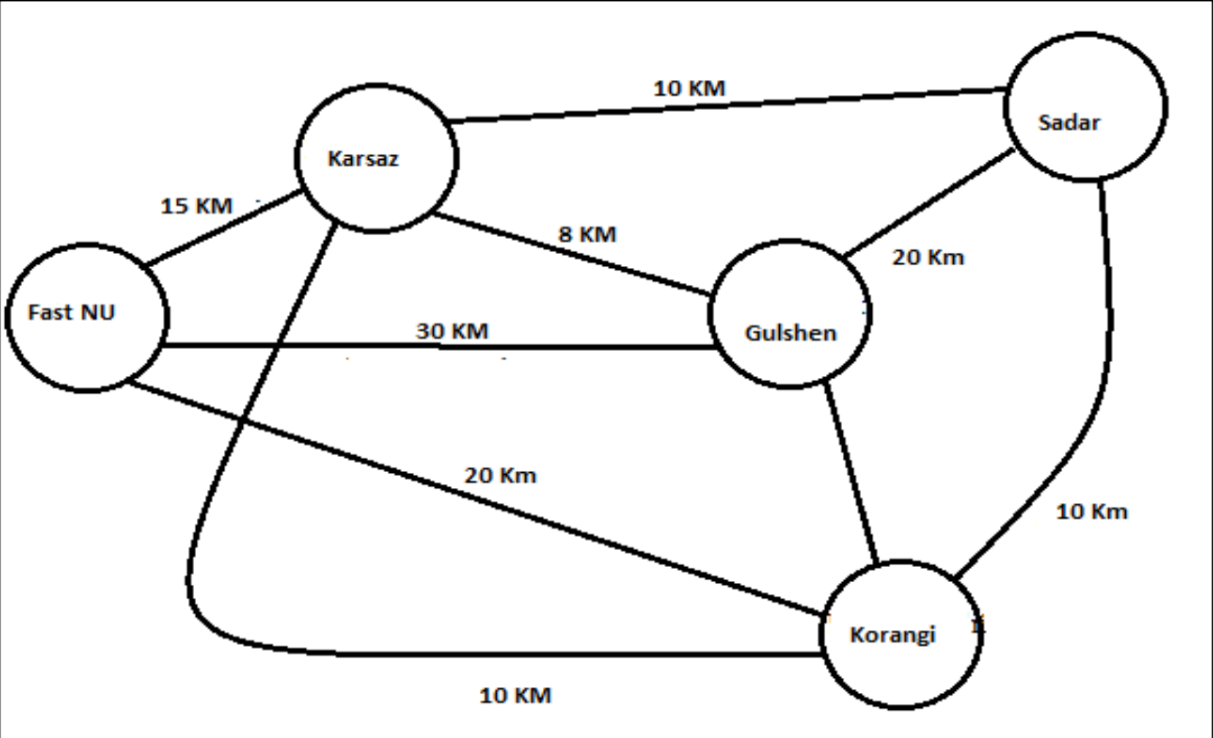

In [ ]:
import heapq

def dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    heap = [(0, start)]
    while heap:
        (distance, current) = heapq.heappop(heap)
        if current == end:
            return distance
        for neighbor in graph[current]:
            new_distance = distance + graph[current][neighbor]
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(heap, (new_distance, neighbor))
    return float('inf')

graph = {
    'FAST NU': {'Karsaz': 15, 'Gulshan': 30,'Korangi':20},
    'Karsaz': {'FAST NU': 15, 'Korangi': 10, 'Sadar': 10,'Gulshan':8},
    'Gulshan': {'FAST NU': 30, 'Karsaz': 8, 'Sadar': 20,'Korangi':20},
    'Korangi': {'FAST NU': 20, 'Karsaz': 10,'Gulshan':20,'Sadar': 10},
    'Sadar': { 'Karsaz': 10,'Gulshan':20,'Korangi': 10}
}

start = 'FAST NU'
end = 'Sadar'
print("Minimum distance from node '%s' to node '%s' is %d" % (start, end, dijkstra(graph, start, end)))


Minimum distance from node 'FAST NU' to node 'Sadar' is 25
